In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
from scipy.signal import savgol_filter


warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from RunGLM import createbehavioralparams
from RunGLM import GLM

## CFC4

In [3]:
FolderName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
animalname = 'CFC4'
exp_taskstotest = ['Task1', 'Task2', 'Task3']
beh_variables = ['pos', 'vel', 'lick']

In [4]:
glm_o = createbehavioralparams(FolderName, animalname)

F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)


In [5]:
F_combined, F, pos, vel, acc, lick = glm_o.get_variables_for_GLM(taskstotest=exp_taskstotest)

Task1
Task2
Task3


(764,)


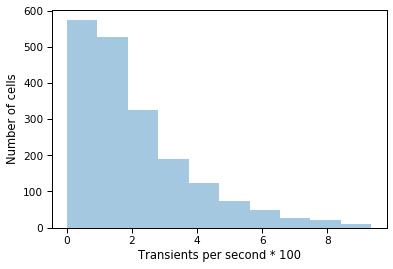

In [6]:
#Take top active cells
activecells = glm_o.find_transient_distribution(F_combined, threshold=0.2, transthreshold=2)
print(np.shape(activecells))

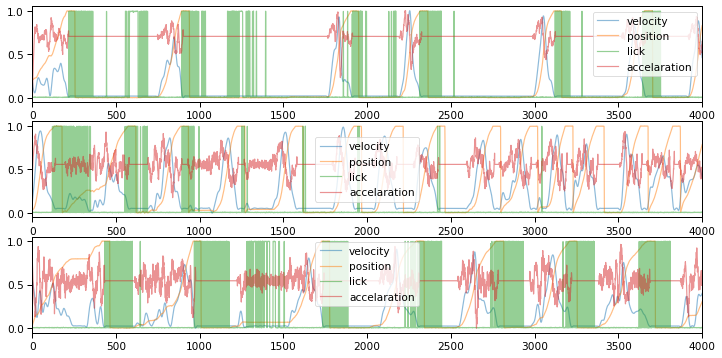

In [7]:
g = GLM( animalname, F, pos, vel, acc, lick, taskstotest=exp_taskstotest)
g.plot_behavior_variables(xlim=4000)

In [11]:
residuals, score, coefficient = g.run_glm(beh_variables, activecells)

Task1
Coundnt run  536
Coundnt run  649
Coundnt run  788
Coundnt run  1515
Task2
Coundnt run  1246
Task3


In [12]:
coefficient_df = pd.melt(coefficient, id_vars=[
                         'Task', 'animalname'], value_vars=beh_variables, 
                         value_name='Coefficient', var_name='Behavior')
coefficient_df['Coefficient'] = np.abs(coefficient_df['Coefficient'])

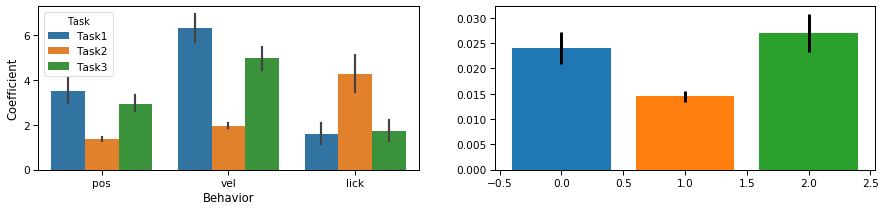

In [13]:
fs, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.barplot(x='Behavior', y='Coefficient', hue='Task', data=coefficient_df, ax=ax[0])
for n, t in enumerate(exp_taskstotest):
    mean = np.median(score[t])
    sem = scipy.stats.sem(score[t])
    ax[1].bar(n, mean)
    ax[1].errorbar(n, mean, yerr=sem, color='k', linewidth=3)

In [14]:
loo_score, loo_coefficient, ratio = g.leave_one_out_test(beh_variables, activecells)

Task1
Coundnt run  536
Coundnt run  649
Coundnt run  788
Coundnt run  1515
Task2
LOO : Coundnt run  461
Coundnt run  1246
Task3


Task1 0 0 0
0.009027998261362968
Task1 1 0 1
0.00394062925320765
Task1 2 0 2
0.0018297298919540128
Task2 0 1 5
0.006353673409864313
Task2 1 1 6
0.0035579499981700513
Task2 2 1 7
0.00019970152472498226
Task3 0 2 10
0.01018193504835413
Task3 1 2 11
0.006509593881585951
Task3 2 2 12
0.0015294218986487973


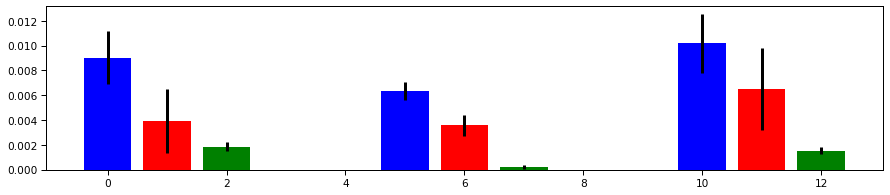

In [15]:
fs, ax = plt.subplots(1, figsize=(15, 3))
axis_count=0
plot_color = ['b', 'r', 'g']
for n, t in enumerate(exp_taskstotest):
    for i in np.arange(len(beh_variables)):
        print(t, i, n, axis_count)
        mean = np.nanmedian(ratio[t][i, :])
        print(mean)
        sem = scipy.stats.sem(ratio[t][i, :], nan_policy='omit')
        ax.bar(axis_count, mean, color=plot_color[i])
        ax.errorbar(axis_count, mean, yerr=sem, color='k', linewidth=3)
        axis_count+=1
    axis_count+=2


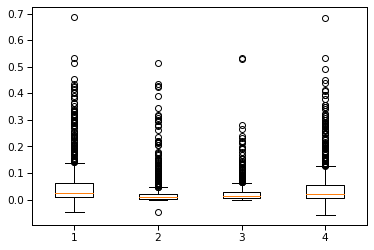

In [16]:
plt.boxplot([score['Task1'], loo_score['Task1'][0, :], loo_score['Task1']
             [1, :], loo_score['Task1'][2, :]], showfliers=True);

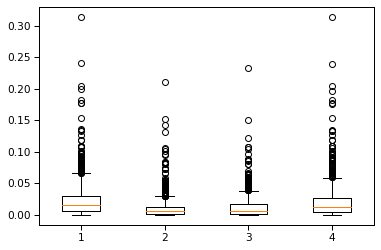

In [17]:
plt.boxplot([score['Task2'], loo_score['Task2'][0, :], loo_score['Task2']
             [1, :], loo_score['Task2'][2, :]], showfliers=True);

In [8]:
score, coefficient = g.run_ridge(beh_variables, activecells)

Task1
Coundnt run  649
Coundnt run  1515
Task2
Task3


In [9]:
coefficient_df = pd.melt(coefficient, id_vars=[
                         'Task', 'animalname'], value_vars=beh_variables, 
                         value_name='Coefficient', var_name='Behavior')
coefficient_df['Coefficient'] = np.abs(coefficient_df['Coefficient'])

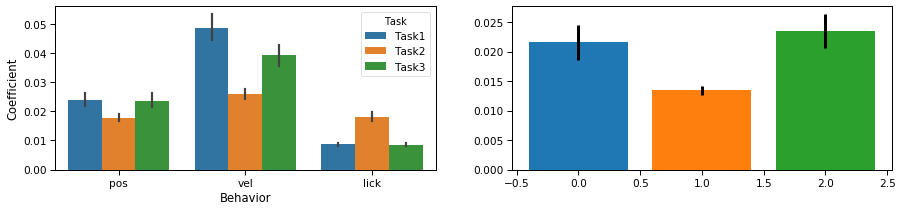

In [10]:
fs, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.barplot(x='Behavior', y='Coefficient', hue='Task', data=coefficient_df, ax=ax[0])
for n, t in enumerate(exp_taskstotest):
    mean = np.median(score[t])
    sem = scipy.stats.sem(score[t])
    ax[1].bar(n, mean)
    ax[1].errorbar(n, mean, yerr=sem, color='k', linewidth=3)

In [11]:
loo_score, loo_coefficient, ratio = g.leave_one_out_test_ridge(beh_variables, activecells)

Task1
Coundnt run  649
Coundnt run  1515
Task2
Task3


Task1 0 0 0
0.4402774118825614
Task1 1 0 1
0.26625212340162585
Task1 2 0 2
0.05057467947699375
Task2 0 1 5
0.4919255840869954
Task2 1 1 6
0.3167887244595099
Task2 2 1 7
0.012278845286740236
Task3 0 2 10
0.4234260316022342
Task3 1 2 11
0.2869187155555284
Task3 2 2 12
0.044761074785777503


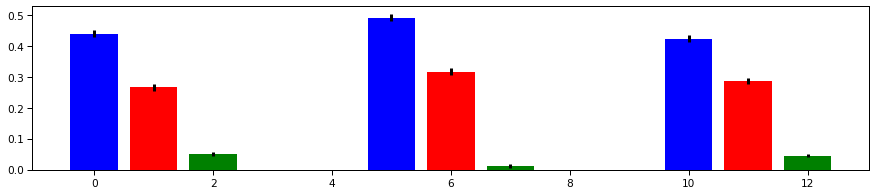

In [12]:
fs, ax = plt.subplots(1, figsize=(15, 3))
axis_count=0
plot_color = ['b', 'r', 'g']
for n, t in enumerate(exp_taskstotest):
    for i in np.arange(len(beh_variables)):
        print(t, i, n, axis_count)
        mean = np.nanmedian(ratio[t][i, :])
        print(mean)
        sem = scipy.stats.sem(ratio[t][i, :], nan_policy='omit')
        ax.bar(axis_count, mean, color=plot_color[i])
        ax.errorbar(axis_count, mean, yerr=sem, color='k', linewidth=3)
        axis_count+=1
    axis_count+=2

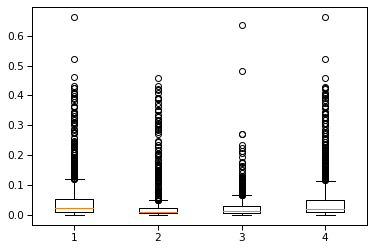

In [10]:
plt.boxplot([score['Task1'], loo_score['Task1'][0, :], loo_score['Task1']
             [1, :], loo_score['Task1'][2, :]], showfliers=True);

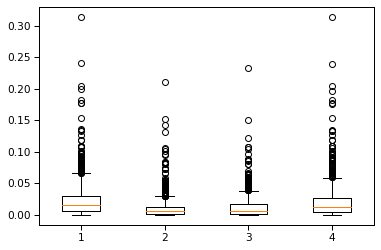

In [18]:
plt.boxplot([score['Task2'], loo_score['Task2'][0, :], loo_score['Task2']
             [1, :], loo_score['Task2'][2, :]], showfliers=True);